# 2.0 EDA - Home Credit Default Risk 

After the first step of the data cleaning, I created three different dataframes for each applicant:
1. application_clean,csv - this file contains cleaned and complete data for each applicant's main data, the columns are not reduced (122 columns in total).
2. REDUCED_application_clean.csv - this file contains cleaned data along with reduced columns (53 columns in total).

## 2.1 Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('data/application_clean.csv')  #application.csv (no column reduction)
df_red = pd.read_csv('data/REDUCED_application_clean.csv') #application dataframs with reduced columns 
df_eng = pd.read_csv('data/application_bureau.csv') #application data combined added features from burea dataframe

print(df.shape)
print(df_red.shape)
print(df_eng.shape)

(307216, 123)
(307216, 54)
(307216, 88)


In [30]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [31]:
pd.options.display.float_format = '{:.2f}'.format

In [32]:
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25,1.70,10.00,5.80,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,3.10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45,3.30,3.20,0.80,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,0.51,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,2.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52,0.60,11.70,6.90,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.50,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,2.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,3,10

In [33]:
df_red.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_DOCUMENTS
0,0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,2.00,2.00,2.00,2.00,3.10,0.00,0.00,0.00,0.00,0.00,1.00,1
1,1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,School,0.31,0.62,0.51,1.00,0.00,1.00,0.00,2.30,0.00,0.00,0.00,0.00,0.00,0.00,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52,0.60,11.70,6.90,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,Government,0.50,0.56,0.73,0.00,0.00,0.00,0.00,2.20,0.00,0.00,0.00,0.00,0.00,0.00,0
3,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52,8.30,26.90,6.70,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.50,0.65,0.51,2.00,0.00,2.00,0.00,1.70,0.00,0.00,0.00,0.00,0.00,1.00,1
4,4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54,8.30,11.80,9.50,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,1,1,Religion,0.50,0.32,0.51,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [34]:
df_eng.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_DOCUMENTS,CREDIT_ACTIVE_ACTIVE_COUNT,AMT_CREDIT_SUM_ACTIVE_MAX,AMT_CREDIT_SUM_ACTIVE_SUM,AMT_CREDIT_SUM_ACTIVE_MEAN,DAYS_CREDIT_ACTIVE_MIN,DAYS_CREDIT_ACTIVE_MAX,DAYS_CREDIT_ACTIVE_MEAN,DAYS_CREDIT_ENDDATE_ACTIVE_MAX,DEBT_PERCENTAGE_ACTIVE_MAX,DEBT_PERCENTAGE_ACTIVE_MEAN,CREDIT_DEBT_DIFF_ACTIVE_MEAN,AMT_CREDIT_SUM_OVERDUE_ACTIVE_MAX,AMT_CREDIT_SUM_OVERDUE_ACTIVE_MEAN,AMT_CREDIT_MAX_OVERDUE_ACTIVE_SUM,AMT_CREDIT_MAX_OVERDUE_ACTIVE_MAX,CNT_CREDIT_PROLONG_ACTIVE_MEAN,DAYS_CREDIT_UPDATE_ACTIVE_MAX,AMT_CREDIT_SUM_DEBT_ACTIVE_SUM,CREDIT_ACTIVE_CLSD_COUNT,AMT_CREDIT_SUM_CLSD_MAX,AMT_CREDIT_SUM_CLSD_SUM,AMT_CREDIT_SUM_CLSD_MEAN,DAYS_CREDIT_CLSD_MIN,DAYS_CREDIT_CLSD_MAX,DAYS_CREDIT_CLSD_MEAN,CREDIT_DEBT_DIFF_CLSD_MIN,CREDIT_DEBT_DIFF_CLSD_MAX,CREDIT_DEBT_DIFF_CLSD_MEAN,AMT_CREDIT_SUM_OVERDUE_CLSD_MAX,AMT_CREDIT_SUM_OVERDUE_CLSD_MEAN,AMT_CREDIT_MAX_OVERDUE_CLSD_SUM,AMT_CREDIT_MAX_OVERDUE_CLSD_MAX,DAYS_CREDIT_UPDATE_CLSD_MAX,CREDIT_UTIL_ACTIVE
0,0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,2.00,2.00,2.00,2.00,3.10,0.00,0.00,0.00,0.00,0.00,1.00,1,2.00,450000.00,481988.57,240994.28,-1042.00,-103.00,-572.50,780.00,0.55,0.27,118103.78,0.00,0.00,40.50,40.50,0.00,-7.00,245781.00,6.00,135000.00,383067.00,63844.50,-1437.00,-476.00,-974.50,0.00,135000.00,85245.00,0.00,0.00,8364.65,5043.65,-34.00,0.51
1,1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,School,0.31,0.62,0.51,1.00,0.00,1.00,0.00,2.30,0.00,0.00,0.00,0.00,0.00,0.00,1,1.00,810000.00,810000.00,810000.00,-606.00,-606.00,-606.00,1216.00,0.00,0.00,810000.00,0.00,0.00,0.00,0.00,0.00,-43.00,0.00,3.00,112500.00,207400.50,69133.50,-2586.00,-775.00,-1665.67,22248.00,112500.00,69133.50,0.00,0.00,0.00,0.00,-540.00,0.00
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52,0.60,11.70,6.90,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,Government,0.50,0.56,0.73,0.00,0.00,0.00,0.00,2.20,0.00,0.00,0.00,0.00,0.00,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00,94537.80,189037.80,94518.90,-1326.00,-408.00,-867.00,94500.00,94537.80,94518.90,0.00,0.00,0.00,0.00,-382.00,nan
3,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52,8.30,26.90,6.70,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.50,0.65,0.51,2.00,0.00,2.00,0.00,1.70,0.00,0.00,0.00,0.00,0.00,1.00,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [35]:
#delete "unnamed:0" column from all dataframes
df.drop('Unnamed: 0', axis=1, inplace=True)
df_red.drop('Unnamed: 0', axis=1, inplace=True)
df_eng.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
df.TARGET.value_counts()/len(df)*100
df.TARGET.value_counts()

0    282412
1     24804
Name: TARGET, dtype: int64

In [37]:
sns.set(rc={'figure.figsize':(10,8)})

In [38]:
#df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)
#get the average for the EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 and store in new column
df['EXT_SOURCE_AVG'] = df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [58]:
df_red['EXT_SOURCE_AVG'] = df_red[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [59]:
df_eng['EXT_SOURCE_AVG'] = df_eng[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

## 2.2 Distribution/Histograms for different features

Text(0.5, 0, 'Figure 1: Distribution of Paid(0) vs. Unpaid(1) Loans')

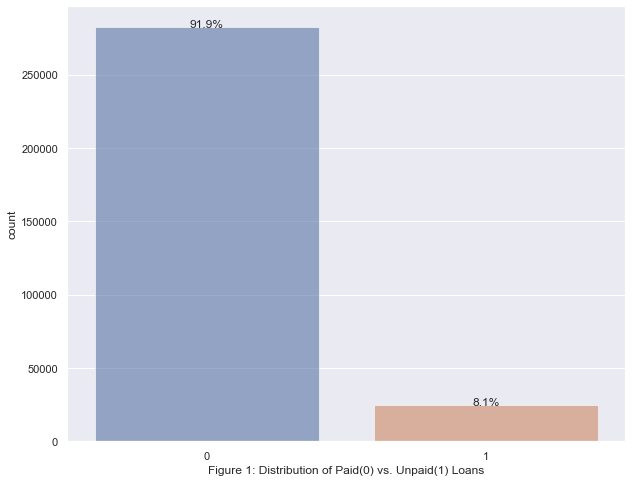

In [39]:
#plot paid vs. unpaid loans
total = len(df)
g = sns.countplot(x='TARGET', data=df, alpha=0.6)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')
plt.xlabel('Figure 1: Distribution of Paid(0) vs. Unpaid(1) Loans')

Based on the histogram above we can see that paid loans represent 91.9% of the data and only 8.1% of loans are unpaid.  This shows that the data is unbalanced which I will process in the next step in order to balance the data. 

Text(0.5, 0, 'Figure 2: Distribution of Paid vs. Unpaid loans by Gender')

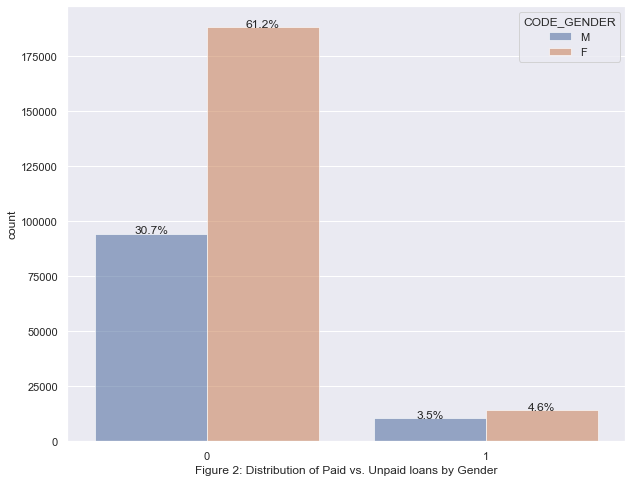

In [40]:
g = sns.countplot(x='TARGET', hue='CODE_GENDER', data=df, alpha=0.6)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')
plt.xlabel('Figure 2: Distribution of Paid vs. Unpaid loans by Gender')

In [41]:
#create a df with defaulted loans to compare to entire population of the dataframe
target1 = df[df['TARGET'] == 1]
target1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24804 entries, 0 to 307214
Columns: 123 entries, SK_ID_CURR to EXT_SOURCE_AVG
dtypes: float64(68), int64(39), object(16)
memory usage: 23.5+ MB


In [89]:
def plotCounts(df, x, order, xlabel, ylabel, title):
    plt.figure(figsize=(10,8))
    sns.set(style='darkgrid')
    g = sns.countplot(x=x, 
                      data=df,
                     order=df[x].value_counts().index)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')
    plt.setp(g.get_xticklabels(), rotation=60)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [90]:
def plotCountsTarget(df, x, order, xlabel, ylabel, title):
    plt.figure(figsize=(10,8))
    sns.set(style='darkgrid')
    g = sns.countplot(x=x, 
                      data=df,
                     order=df[x].value_counts().index, hue ='TARGET')
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')
    plt.setp(g.get_xticklabels(), rotation=60)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

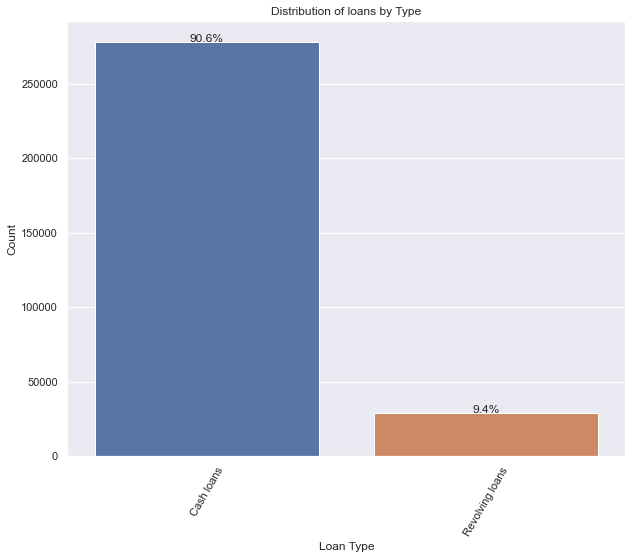

In [91]:
plotCounts(df, 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_TYPE', 'Loan Type', 'Count', 'Distribution of loans by Type')

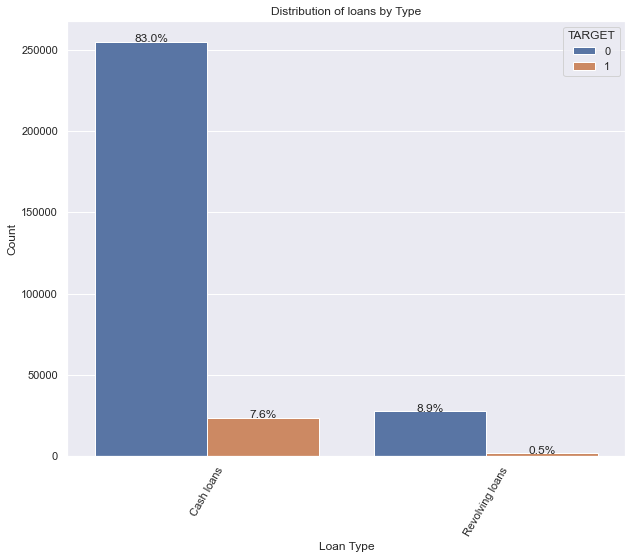

In [93]:
plotCountsTarget(df, 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_TYPE', 'Loan Type', 'Count', 'Distribution of loans by Type')

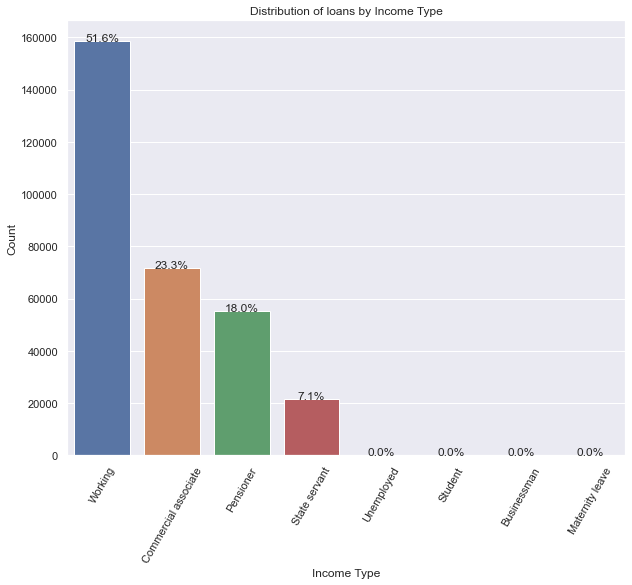

In [45]:
#plot distribution of loans by income type 
plotCounts(df, 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE' , 'Income Type', 'Count','Distribution of loans by Income Type')

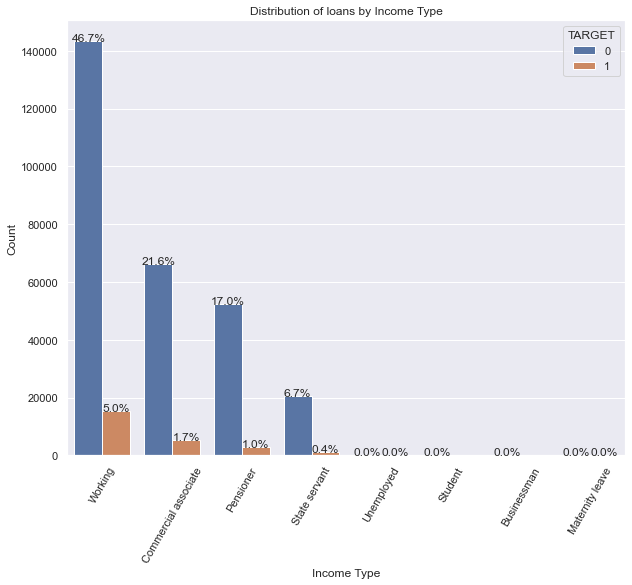

In [94]:
plotCountsTarget(df, 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE' , 'Income Type', 'Count','Distribution of loans by Income Type')

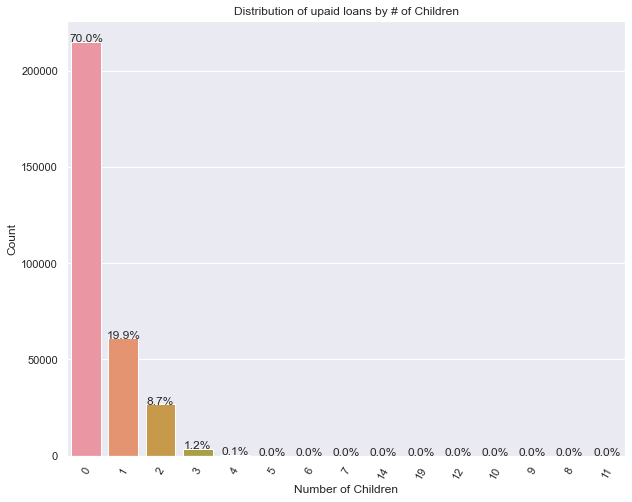

In [95]:
plotCounts(df, 'CNT_CHILDREN', 'CNT_CHILDREN' , 'Number of Children', 'Count','Distribution of upaid loans by # of Children')

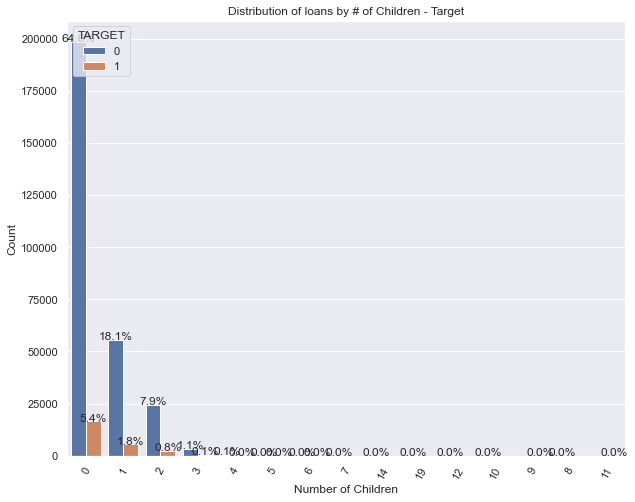

In [96]:
plotCountsTarget(df, 'CNT_CHILDREN', 'CNT_CHILDREN' , 'Number of Children', 'Count','Distribution of loans by # of Children - Target')

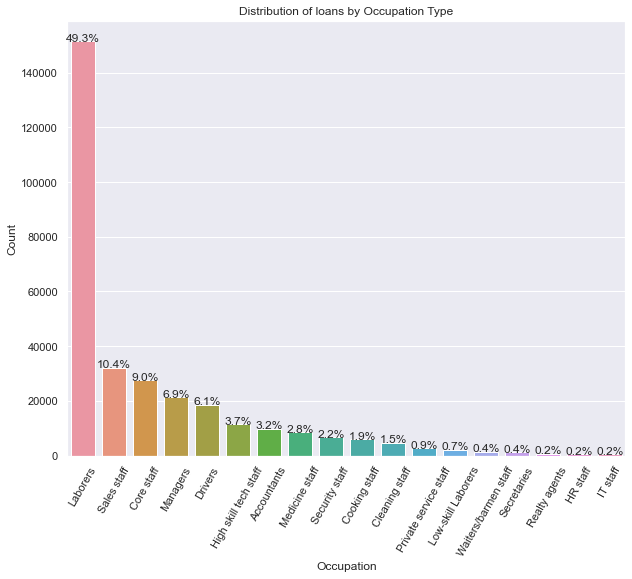

In [48]:
#AMT_INCOME_TOTAL
plotCounts(df, 'OCCUPATION_TYPE', 'OCCUPATION_TYPE' , 'Occupation', 'Count','Distribution of loans by Occupation Type')

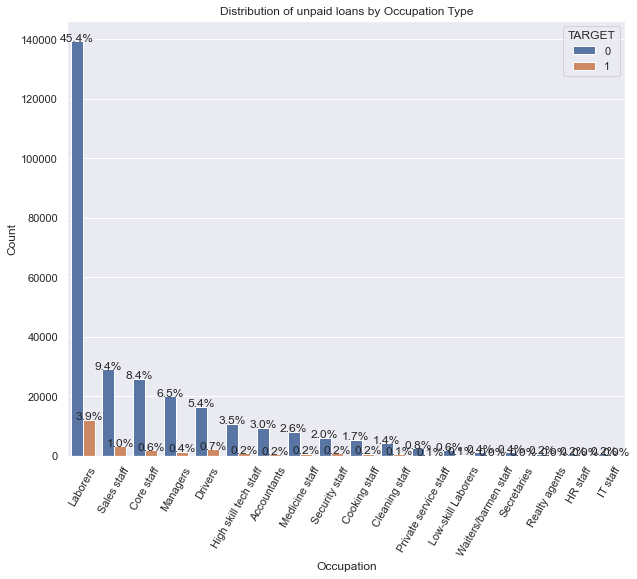

In [97]:
plotCountsTarget(df, 'OCCUPATION_TYPE', 'OCCUPATION_TYPE' , 'Occupation', 'Count','Distribution of unpaid loans by Occupation Type')

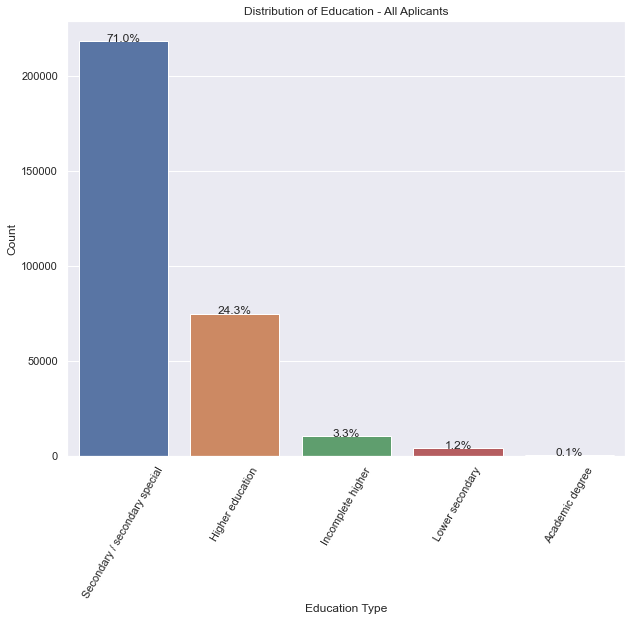

In [98]:
plotCounts(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE' , 'Education Type', 
           'Count','Distribution of Education - All Aplicants')

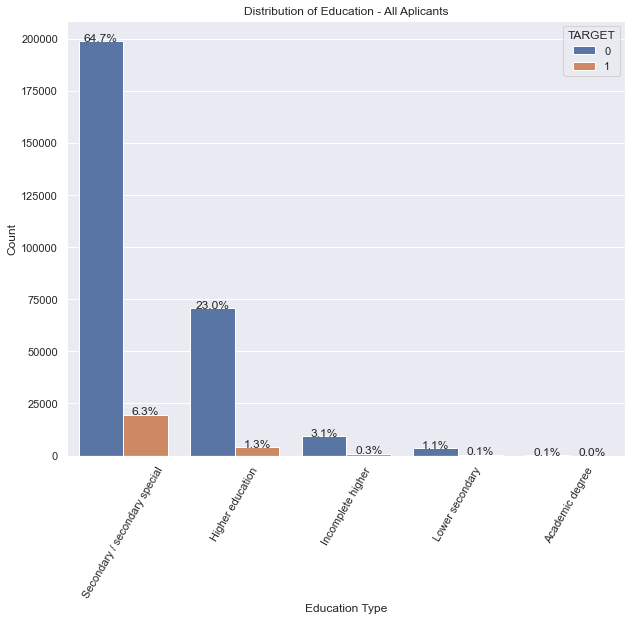

In [99]:
plotCountsTarget(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE' , 'Education Type', 
           'Count','Distribution of Education - All Aplicants')

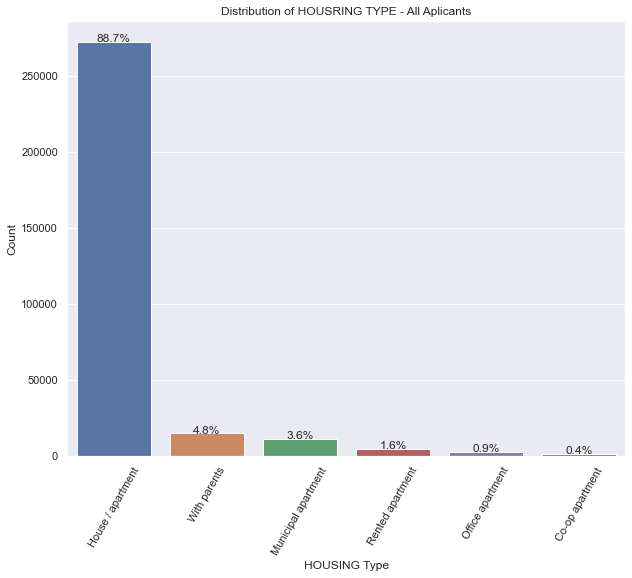

In [81]:
plotCounts(df, 'NAME_HOUSING_TYPE', 'NAME_HOUSING_TYPE' , 'HOUSING Type', 
           'Count','Distribution of HOUSRING TYPE - All Aplicants')

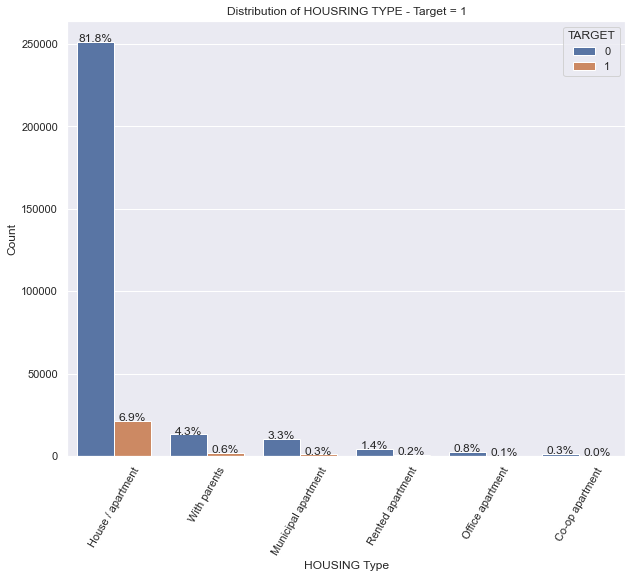

In [100]:
plotCountsTarget(df, 'NAME_HOUSING_TYPE', 'NAME_HOUSING_TYPE' , 'HOUSING Type', 
           'Count','Distribution of HOUSRING TYPE - Target = 1')

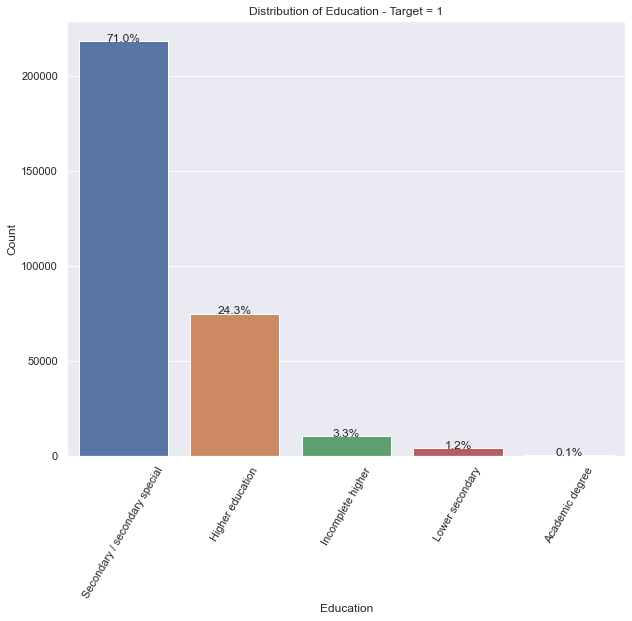

In [101]:
#NAME_FAMILY_STATUS	NAME_HOUSING_TYPE
plotCounts(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE' , 'Education', 
           'Count','Distribution of Education - Target = 1')

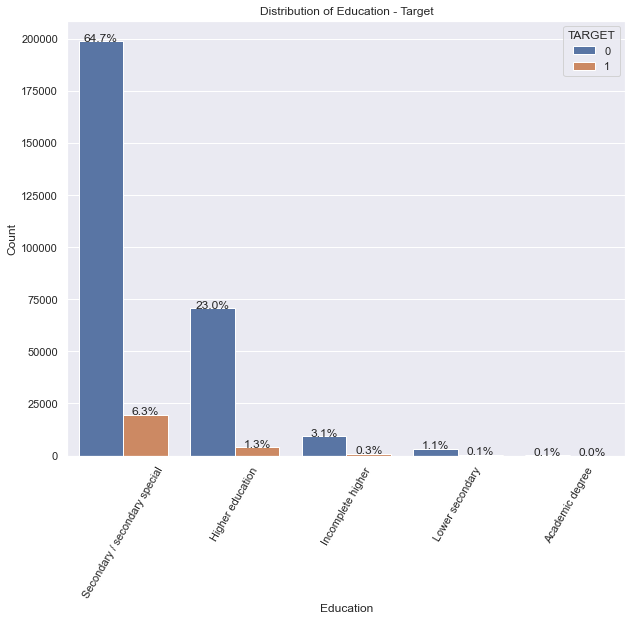

In [102]:
#NAME_FAMILY_STATUS	NAME_HOUSING_TYPE
plotCountsTarget(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE' , 'Education', 
           'Count','Distribution of Education - Target')

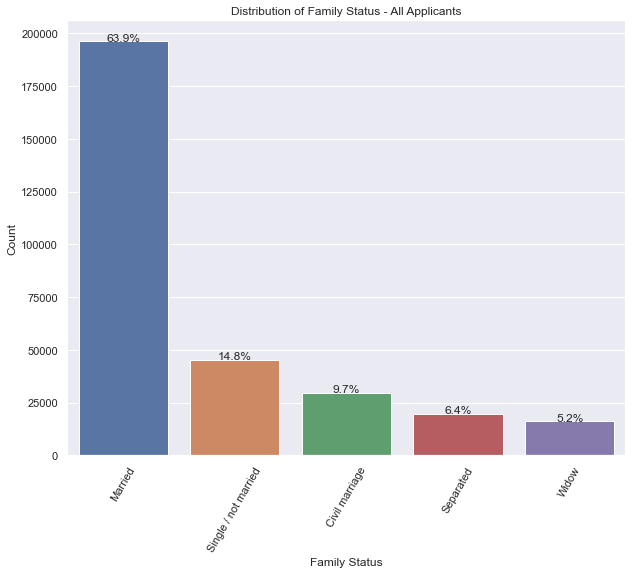

In [52]:

plotCounts(df, 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS' , 'Family Status', 
           'Count','Distribution of Family Status - All Applicants')

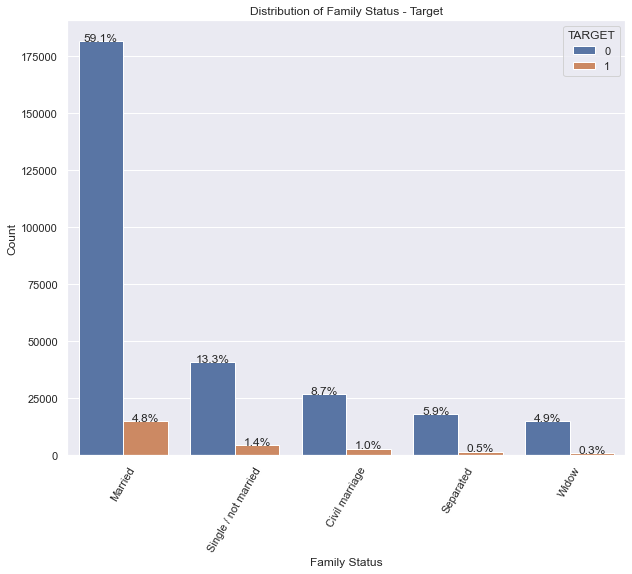

In [103]:
plotCountsTarget(df, 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS' , 'Family Status', 
           'Count','Distribution of Family Status - Target')

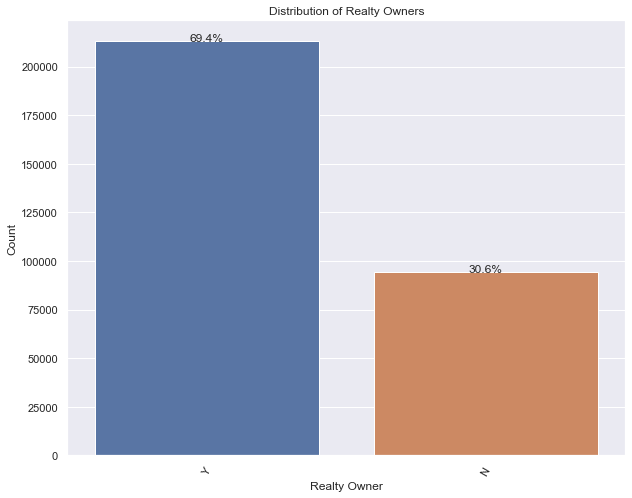

In [78]:
plotCounts(df, 'FLAG_OWN_REALTY', 'FLAG_OWN_REALTY' , 'Realty Owner', 
           'Count','Distribution of Realty Owners')

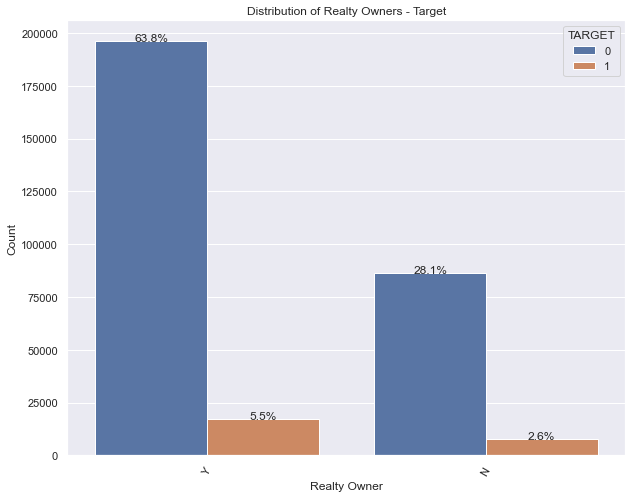

In [104]:
plotCountsTarget(df, 'FLAG_OWN_REALTY', 'FLAG_OWN_REALTY' , 'Realty Owner', 
           'Count','Distribution of Realty Owners - Target')

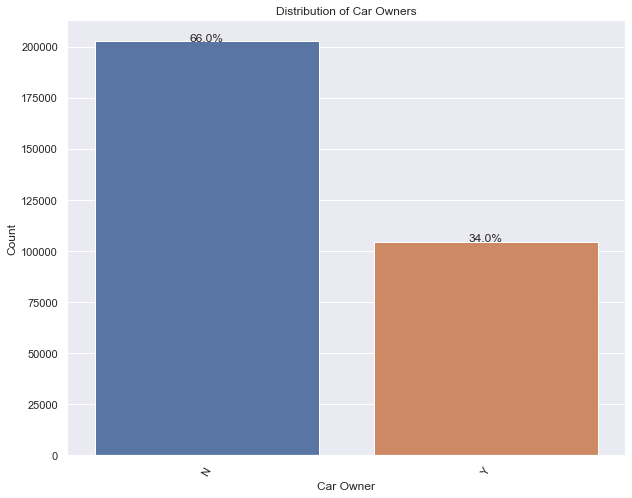

In [79]:
plotCounts(df, 'FLAG_OWN_CAR', 'FLAG_OWN_CAR' , 'Car Owner', 
           'Count','Distribution of Car Owners')

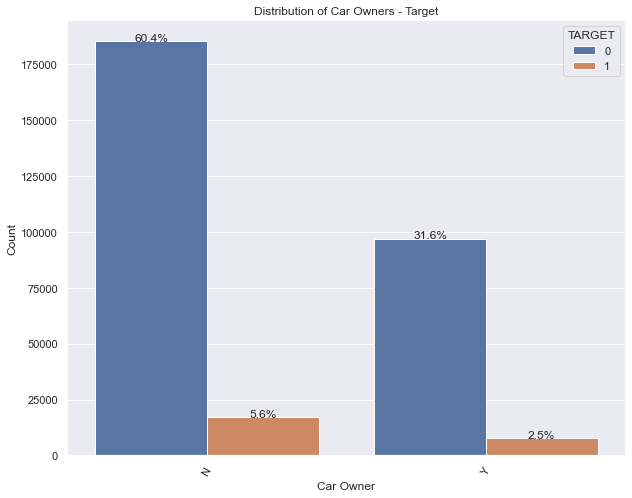

In [105]:
plotCountsTarget(df, 'FLAG_OWN_CAR', 'FLAG_OWN_CAR' , 'Car Owner', 
           'Count','Distribution of Car Owners - Target')

In [120]:
# Age information into a separate dataframe
age_data = df[['TARGET', 'AGE']]

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['AGE'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,AGE,YEARS_BINNED
0,1,25,"(20.0, 25.0]"
1,0,45,"(40.0, 45.0]"
2,0,52,"(50.0, 55.0]"
3,0,52,"(50.0, 55.0]"
4,0,54,"(50.0, 55.0]"
5,0,46,"(45.0, 50.0]"
6,0,37,"(35.0, 40.0]"
7,0,51,"(50.0, 55.0]"
8,0,55,"(50.0, 55.0]"
9,0,39,"(35.0, 40.0]"


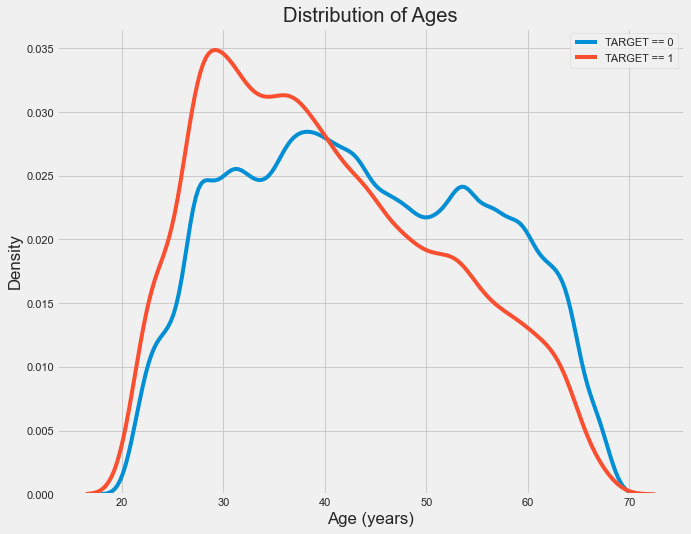

In [125]:
# KDE plot of loans that were repaid on time
plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'AGE'], label = 'TARGET == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'AGE'], label = 'TARGET == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend()

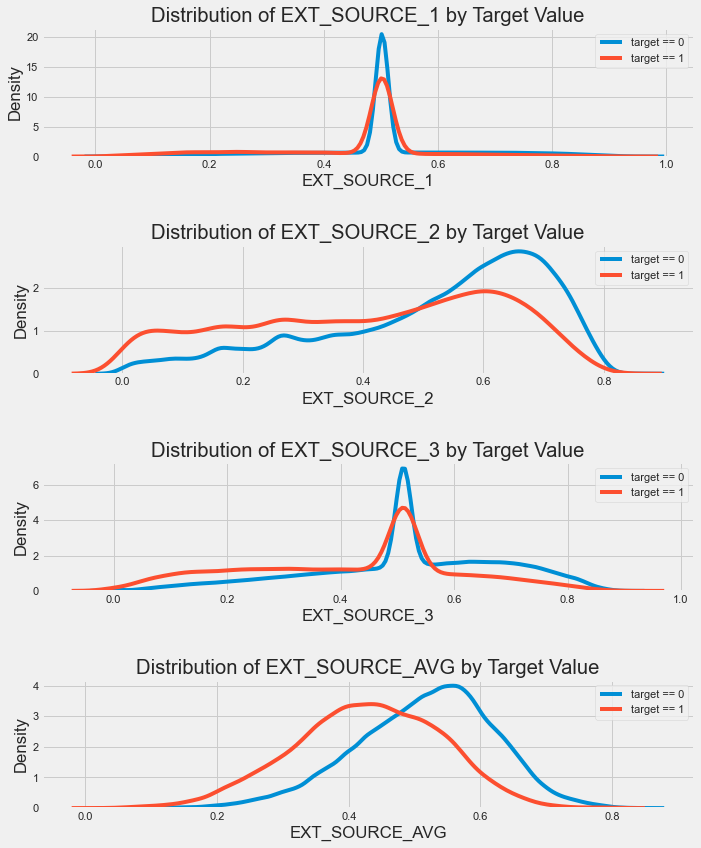

In [130]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_AVG']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
plt.tight_layout(h_pad = 2.5)

Based on the above plot we can see that the lower the EXT_SOURCE, the higher unpaid loans are (target==1).  Especially for the middle plot, we can see the higher EXT_SOURCE_2 get (closer to 0.8), the unpaid loans are very close to 0.

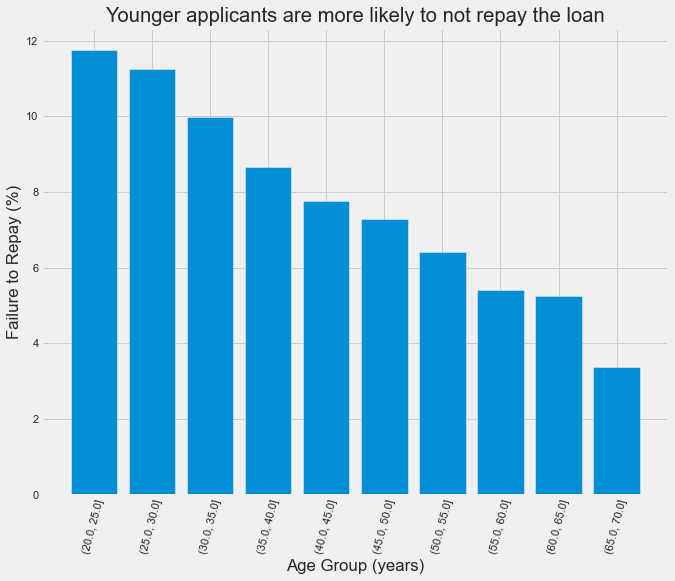

In [129]:
# Graph the age bins and the average of the target as a bar plot
age_groups  = age_data.groupby('YEARS_BINNED').mean()
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Younger applicants are more likely to not repay the loan');
##plt.title('Younger applicants are more likely to not repay the loan.  The rate of failure to repay the loan is above 30% for applicants between the age of 20 and 35.');

## 2.3 Correlations

In [55]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 AMT_REQ_CREDIT_BUREAU_YEAR    0.01
CNT_CHILDREN                  0.02
FLAG_WORK_PHONE               0.03
DEF_60_CNT_SOCIAL_CIRCLE      0.03
DEF_30_CNT_SOCIAL_CIRCLE      0.03
LIVE_CITY_NOT_WORK_CITY       0.03
OWN_CAR_AGE                   0.04
FLAG_DOCUMENT_3               0.04
REG_CITY_NOT_LIVE_CITY        0.04
FLAG_EMP_PHONE                0.05
REG_CITY_NOT_WORK_CITY        0.05
REGION_RATING_CLIENT          0.06
REGION_RATING_CLIENT_W_CITY   0.06
TARGET                        1.00
FLAG_MOBIL                     nan
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_AVG               -0.22
EXT_SOURCE_2                 -0.16
EXT_SOURCE_3                 -0.16
EXT_SOURCE_1                 -0.10
AGE                          -0.08
YEARS_EMPLOYED               -0.07
YEARS_PHONE_CHANGE           -0.06
YEARS_ID_PUBLISH             -0.05
FLOORSMAX_AVG                -0.04
FLOORSMAX_MEDI               -0.04
FLOORSMAX_MODE               -0.04
YE

In [60]:
# Find correlations with the target and sort
correlations = df_red.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CNT_FAM_MEMBERS               0.01
AMT_REQ_CREDIT_BUREAU_YEAR    0.01
TOTAL_DOCUMENTS               0.02
CNT_CHILDREN                  0.02
FLAG_WORK_PHONE               0.03
DEF_60_CNT_SOCIAL_CIRCLE      0.03
DEF_30_CNT_SOCIAL_CIRCLE      0.03
LIVE_CITY_NOT_WORK_CITY       0.03
REG_CITY_NOT_LIVE_CITY        0.04
FLAG_EMP_PHONE                0.05
REG_CITY_NOT_WORK_CITY        0.05
REGION_RATING_CLIENT          0.06
REGION_RATING_CLIENT_W_CITY   0.06
TARGET                        1.00
FLAG_MOBIL                     nan
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_AVG               -0.22
EXT_SOURCE_2                 -0.16
EXT_SOURCE_3                 -0.16
EXT_SOURCE_1                 -0.10
AGE                          -0.08
YEARS_EMPLOYED               -0.07
YEARS_PHONE_CHANGE           -0.06
YEARS_ID_PUBLISH             -0.05
YEARS_REGISTRATION           -0.04
AMT_GOODS_PRICE              -0.04
REGION_POPULATION_RELATIVE   -0.04
AM

In [61]:
# Find correlations with the target and sort
correlations = df_eng.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY          0.03
DAYS_CREDIT_ACTIVE_MIN           0.04
DAYS_CREDIT_ENDDATE_ACTIVE_MAX   0.04
REG_CITY_NOT_LIVE_CITY           0.04
FLAG_EMP_PHONE                   0.05
REG_CITY_NOT_WORK_CITY           0.05
DAYS_CREDIT_CLSD_MEAN            0.06
REGION_RATING_CLIENT             0.06
DAYS_CREDIT_ACTIVE_MAX           0.06
REGION_RATING_CLIENT_W_CITY      0.06
CREDIT_ACTIVE_ACTIVE_COUNT       0.06
DAYS_CREDIT_CLSD_MIN             0.06
DAYS_CREDIT_ACTIVE_MEAN          0.06
TARGET                           1.00
FLAG_MOBIL                        nan
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_AVG                 -0.22
EXT_SOURCE_2                   -0.16
EXT_SOURCE_3                   -0.16
EXT_SOURCE_1                   -0.10
AGE                            -0.08
YEARS_EMPLOYED                 -0.07
YEARS_PHONE_CHANGE             -0.06
YEARS_ID_PUBLISH               -0.05
YEARS_REGISTRATION             -0.04
CREDIT_DE

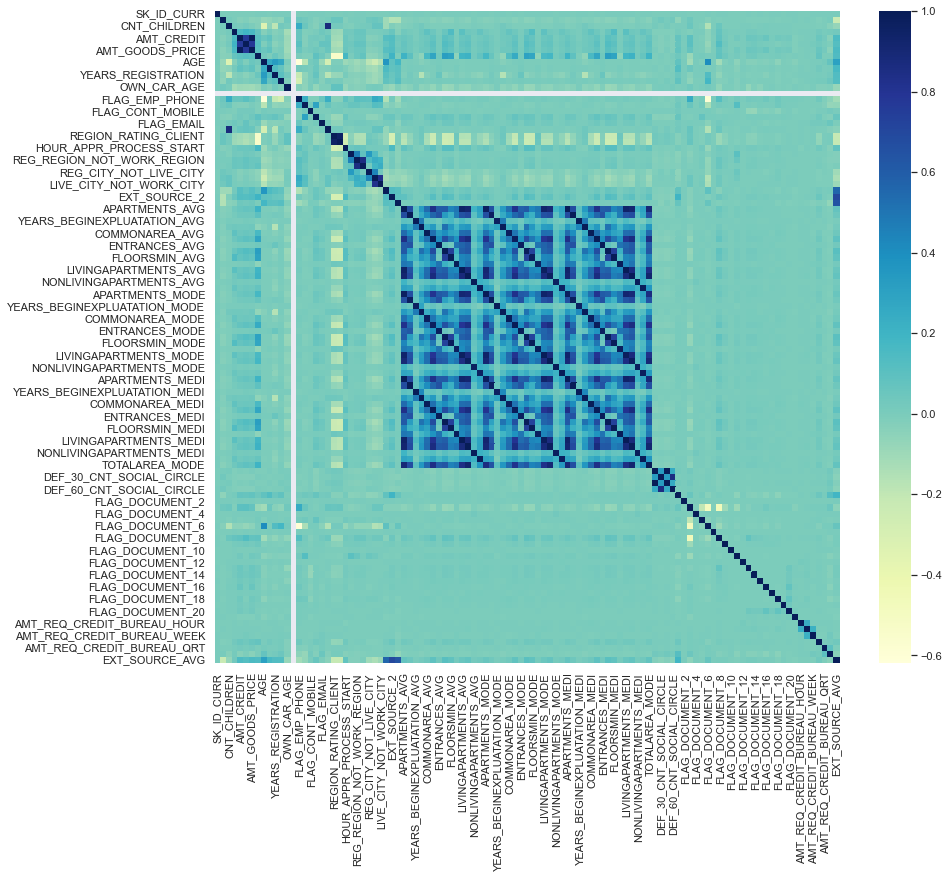

In [62]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(),cmap='YlGnBu');

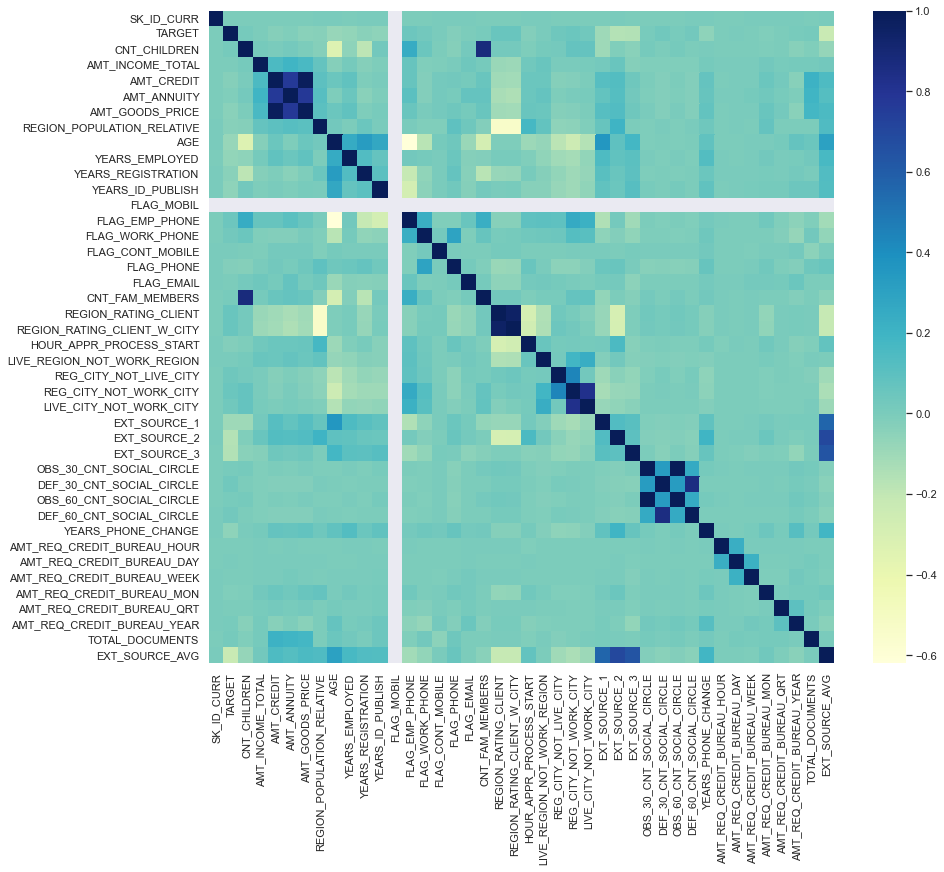

In [64]:
plt.subplots(figsize=(14,12))
sns.heatmap(df_red.corr(),cmap='YlGnBu');

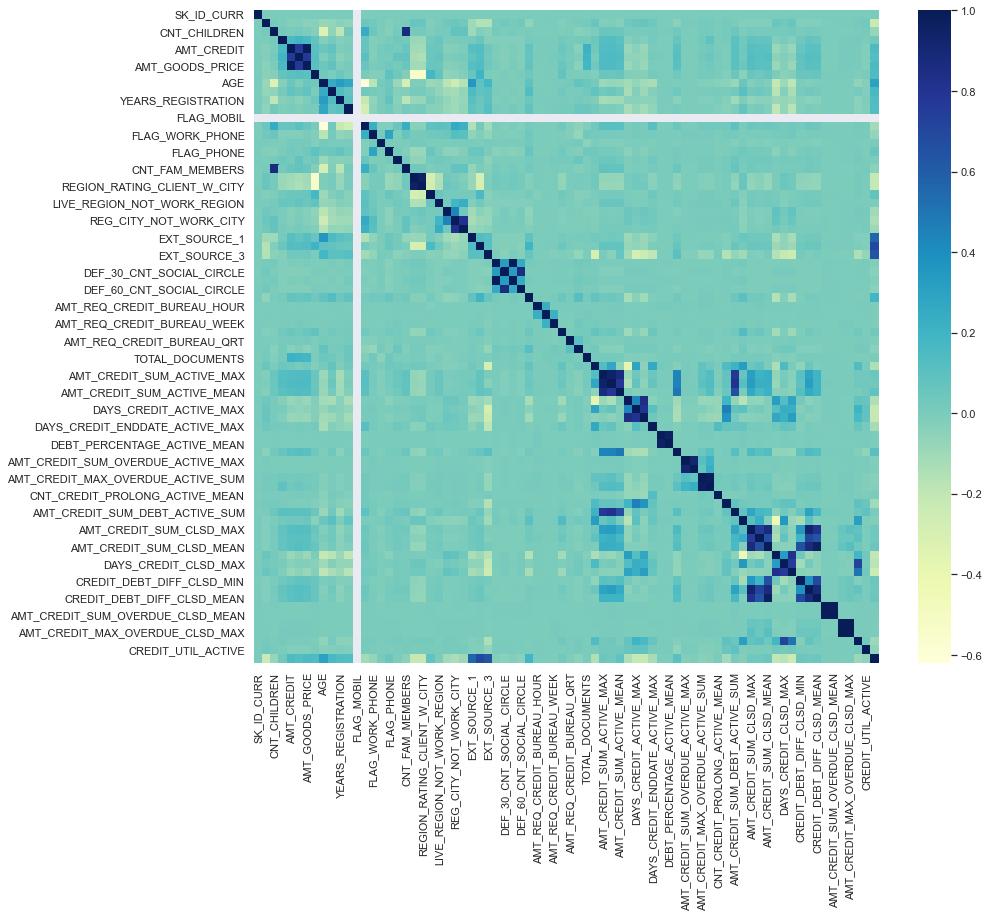

In [65]:
plt.subplots(figsize=(14,12))
sns.heatmap(df_eng.corr(),cmap='YlGnBu');

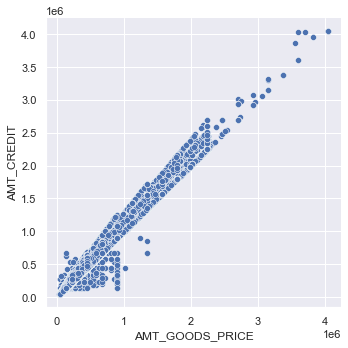

In [108]:

sns.relplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=df)
#sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=df)

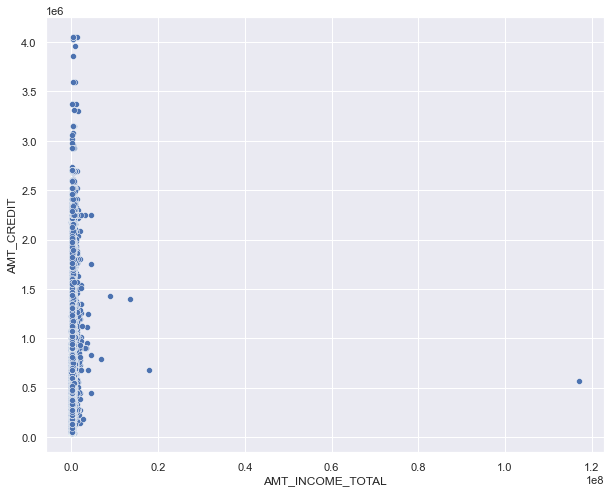

In [107]:
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=df)

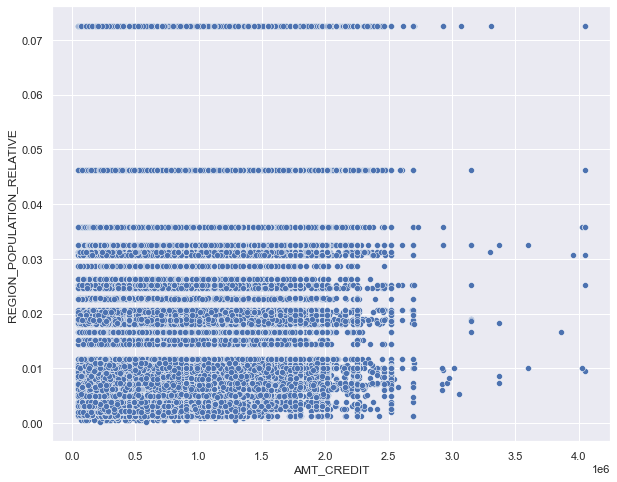

In [109]:

sns.scatterplot(x="AMT_CREDIT", y="REGION_POPULATION_RELATIVE", data=df)

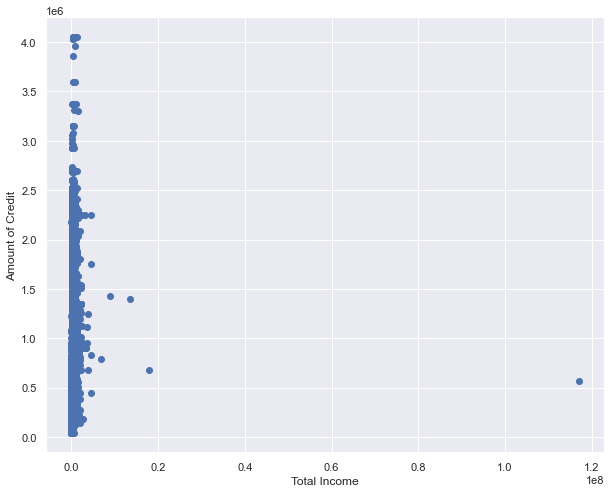

In [112]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'])
ax.set_xlabel('Total Income')
ax.set_ylabel('Amount of Credit')
plt.show()

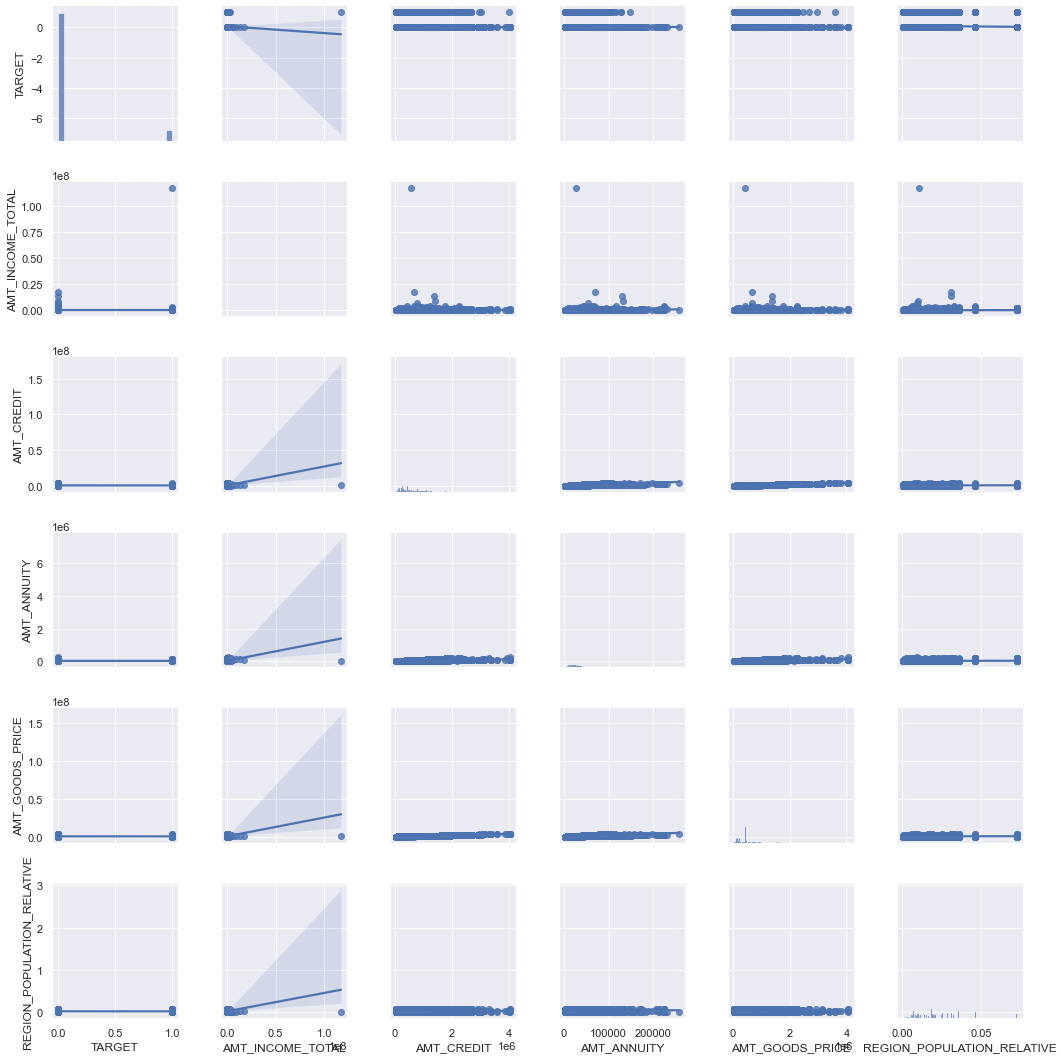

In [86]:
sns.pairplot(df, vars=['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                       'REGION_POPULATION_RELATIVE'], kind='reg')
plt.show()

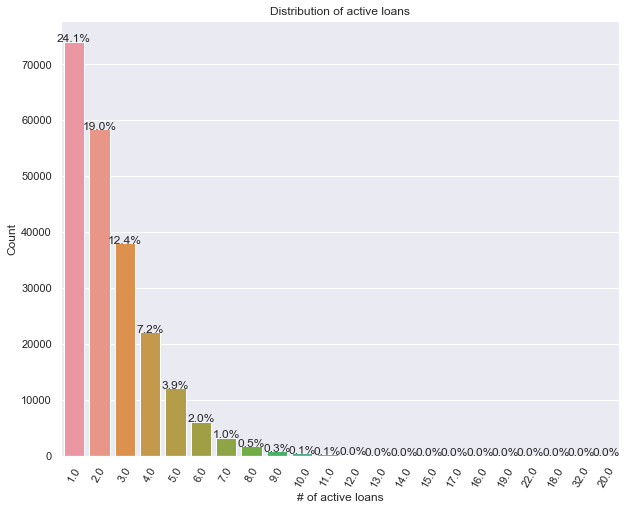

In [114]:
plotCounts(df_eng, 'CREDIT_ACTIVE_ACTIVE_COUNT', 'CREDIT_ACTIVE_ACTIVE_COUNT' , '# of active loans', 
           'Count','Distribution of active loans')

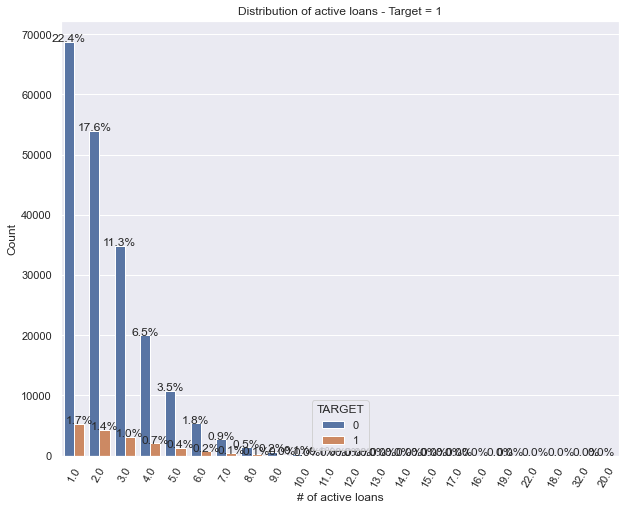

In [116]:
plotCountsTarget(df_eng, 'CREDIT_ACTIVE_ACTIVE_COUNT', 'CREDIT_ACTIVE_ACTIVE_COUNT' , '# of active loans', 
           'Count','Distribution of active loans - Target = 1')